**Hypothesis**: When sentiment transitions from greed to fear, the market is likely to go down for a while.

**Idea**: When sentiment is falling vertically (high, negative momentum) we can keep DCA money for when momentum decreases and sentiment is still low.

Text(0.5, 1.0, 'BTC Price colored by sentiment')

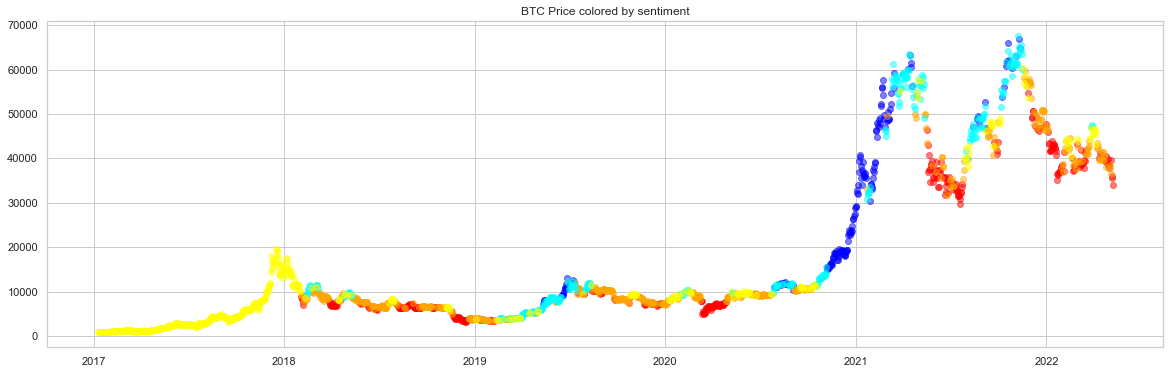

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import sys
sys.path.append('../src')
from data_load.csvs import get_asset_price_history
from strategies import WeeklyFNGDCA, WeeklyRSIDCA

sns.set_theme(style="whitegrid")


# Set experiment parameters

START = "2017-01-01"
END = "2022-05-08"
ASSET = "BTC"
WEEKLY_INVESTMENT = 100

# Collect BTC data

df = get_asset_price_history(ASSET, START, END)

df = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)
df = WeeklyRSIDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)

fig, ax = plt.subplots(figsize=(20, 6))

for fng_class, df_fng in df.groupby("FNGClass"):
    colors = { "Extreme Fear": "red", "Fear": "orange", "Neutral": "yellow", "Greed": "cyan", "Extreme Greed": "blue", }
    ax.scatter(df_fng.index, df_fng.Close, color=colors[fng_class], marker="o", alpha=0.5, label=fng_class)

ax.set_title("BTC Price colored by sentiment")

In [2]:
fear_period = []
fear_periods = []
sentiment = "Neutral"
fng = 50.0

start = None
stop = None
previous_i = None

for i, row in df.iterrows():
    
    # Enter fear period
    
    if row.FNGClass in ["Fear", "Extreme Fear"] and sentiment in ["Neutral", "Greed", "Extreme Greed"] and stop is None:
        print(f"Coming from {sentiment} ({fng})")
        start = previous_i
                
    # Close fear period
    
    if row.FNGClass in ["Greed", "Extreme Greed"] and sentiment in ["Neutral", "Fear", "Extreme Fear"] and start is not None:
        stop = i
        fear_periods.append((start, stop))
        print(f"Fear period between {start} and {stop}")
        start = None
        stop = None
    
    sentiment = row.FNGClass
    fng = row.FNG
    previous_i = i
    
print(len(fear_periods))

Coming from Neutral (50.0)
Coming from Neutral (54.0)
Fear period between 2018-02-10 00:00:00 and 2018-02-14 00:00:00
Coming from Neutral (54.0)
Fear period between 2018-02-21 00:00:00 and 2018-03-03 00:00:00
Coming from Greed (56.0)
Fear period between 2018-03-03 00:00:00 and 2018-03-05 00:00:00
Coming from Greed (59.0)
Coming from Neutral (50.0)
Fear period between 2018-04-16 00:00:00 and 2018-04-25 00:00:00
Coming from Greed (63.0)
Coming from Neutral (47.0)
Coming from Neutral (48.0)
Fear period between 2018-07-31 00:00:00 and 2018-11-13 00:00:00
Coming from Neutral (49.0)
Coming from Neutral (48.0)
Coming from Neutral (48.0)
Fear period between 2019-02-14 00:00:00 and 2019-02-18 00:00:00
Coming from Neutral (47.0)
Fear period between 2019-02-25 00:00:00 and 2019-03-07 00:00:00
Coming from Neutral (50.0)
Fear period between 2019-03-23 00:00:00 and 2019-03-30 00:00:00
Coming from Greed (65.0)
Fear period between 2019-04-11 00:00:00 and 2019-04-13 00:00:00
Coming from Greed (58.0)
Fe

Price drop: -0.057055887181612766


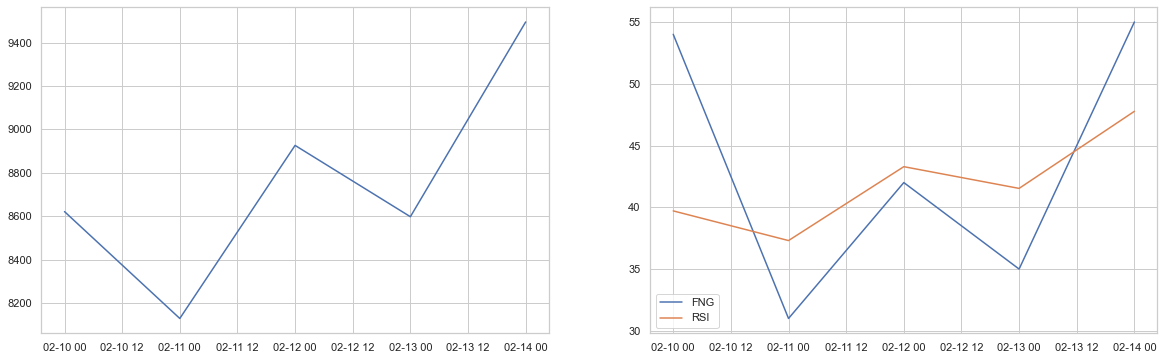

Price drop: -0.09594307832132153


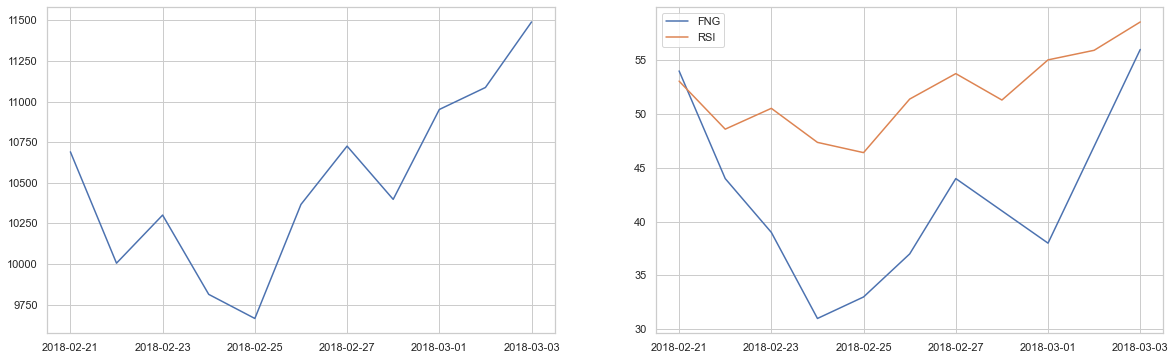

Price drop: 0.0


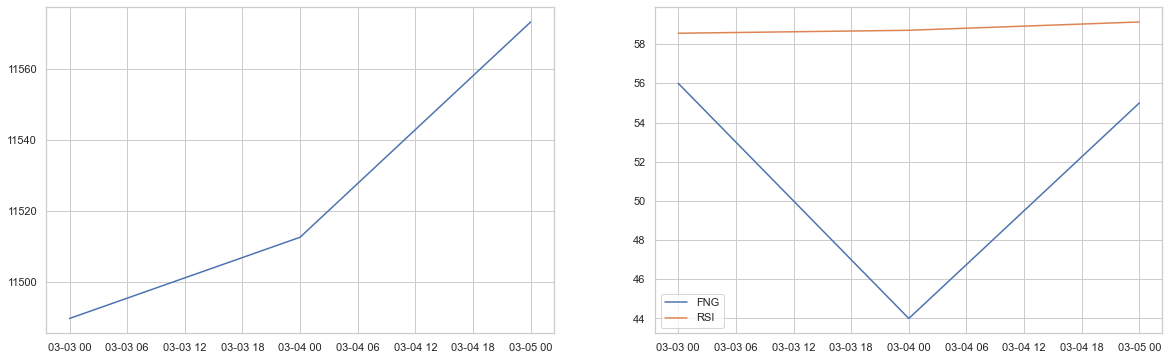

Price drop: -0.01943001506644907


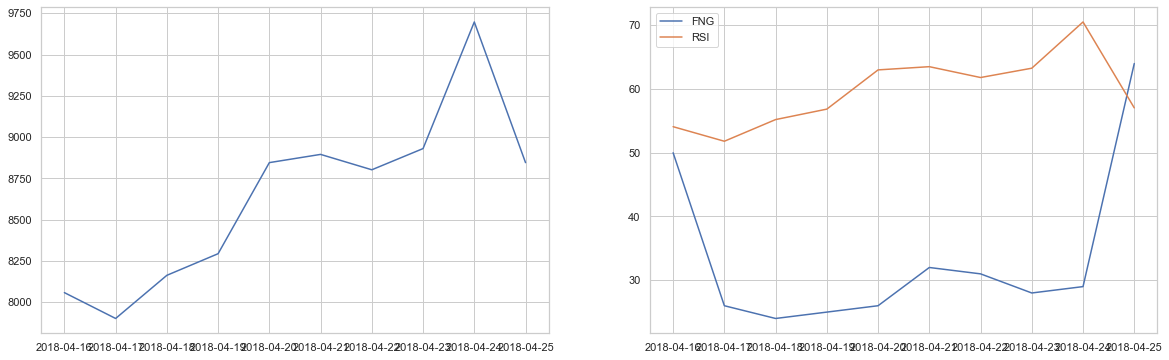

Price drop: -0.2050950835814697


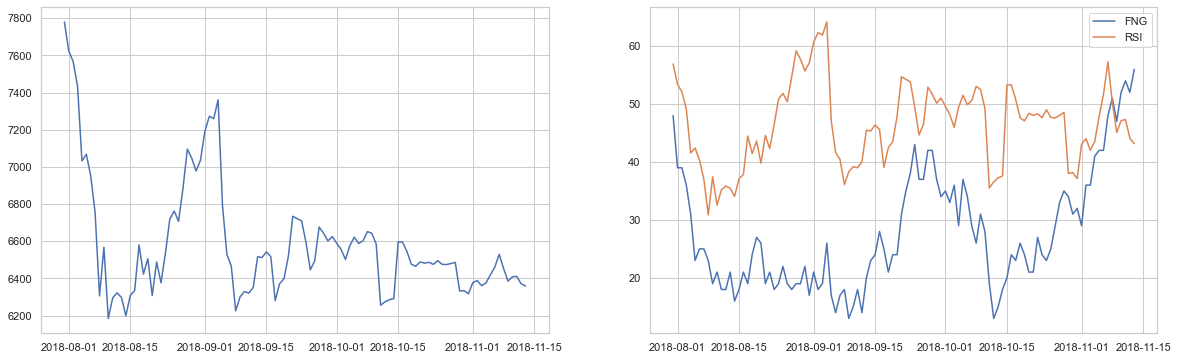

Price drop: 0.0


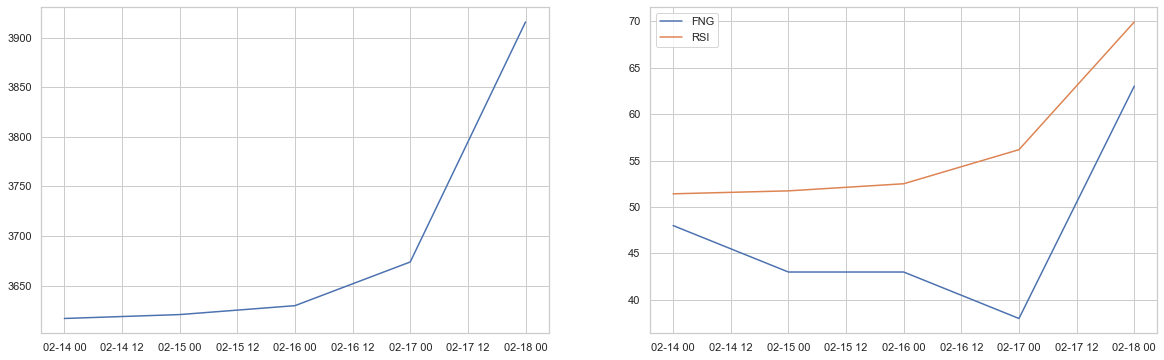

Price drop: -0.031199751663089758


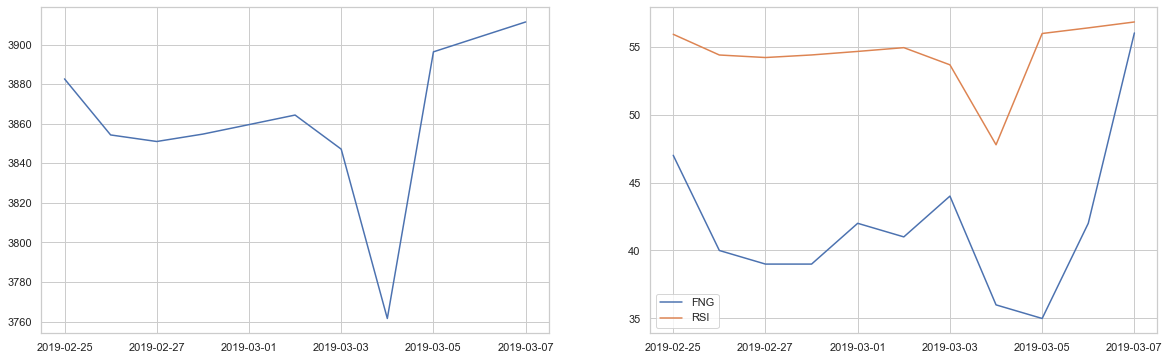

Price drop: -0.01802749957519478


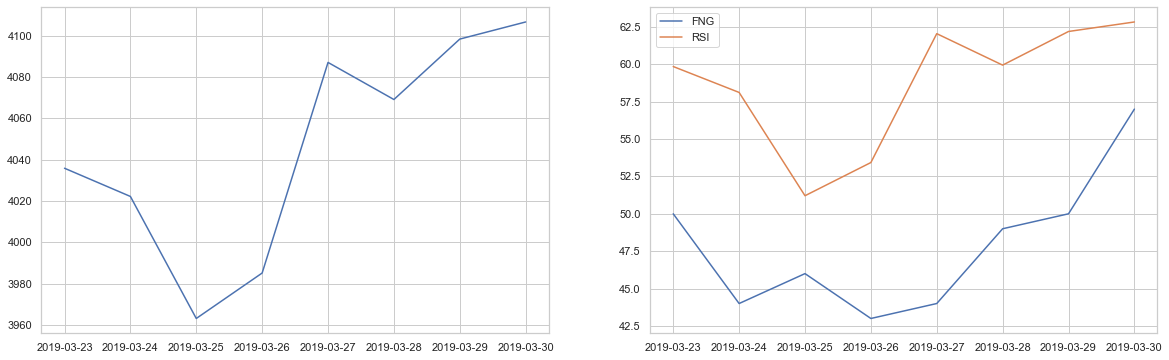

Price drop: 0.0


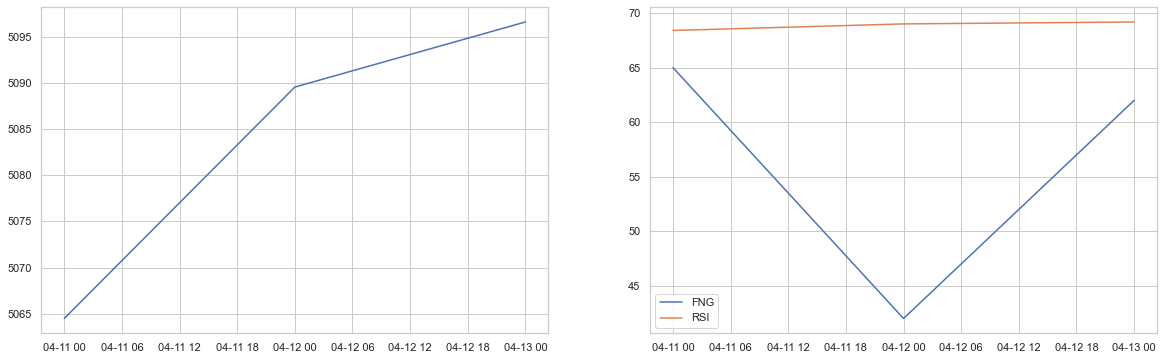

Price drop: 0.0


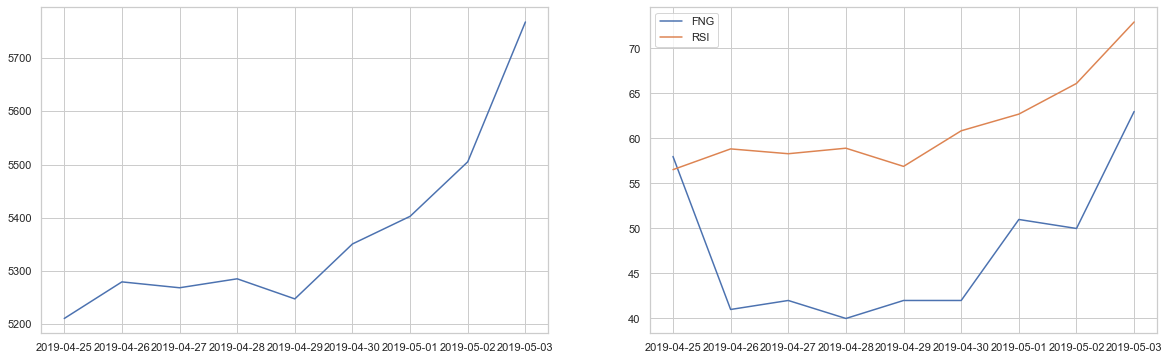

Price drop: -0.06105791438004581


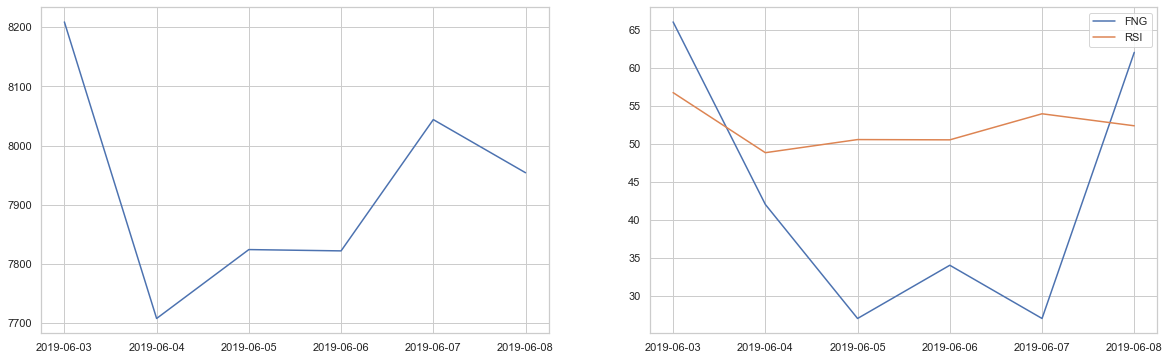

Price drop: 0.0


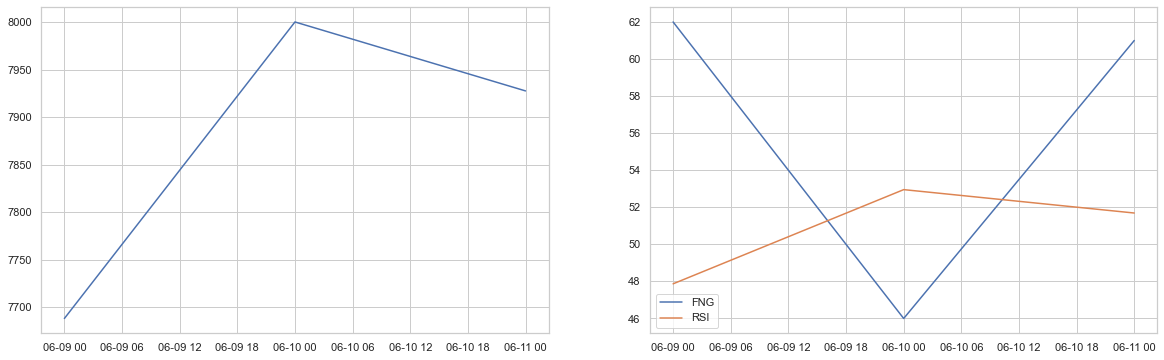

Price drop: 0.0


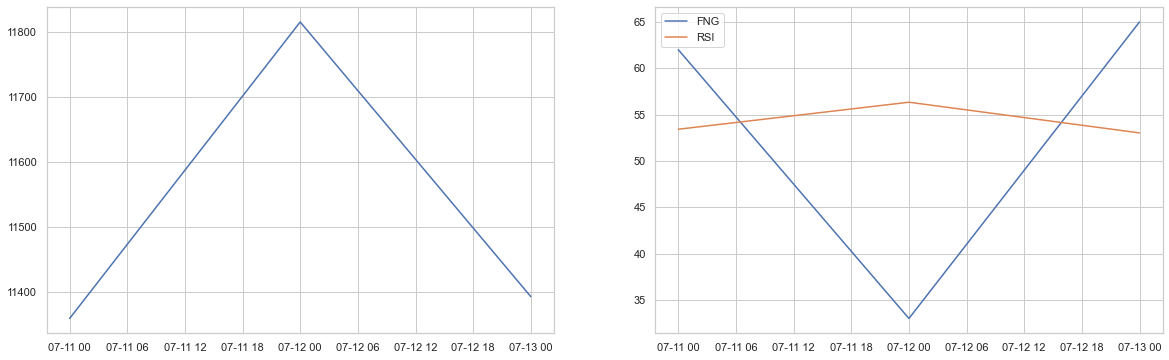

Price drop: 0.0


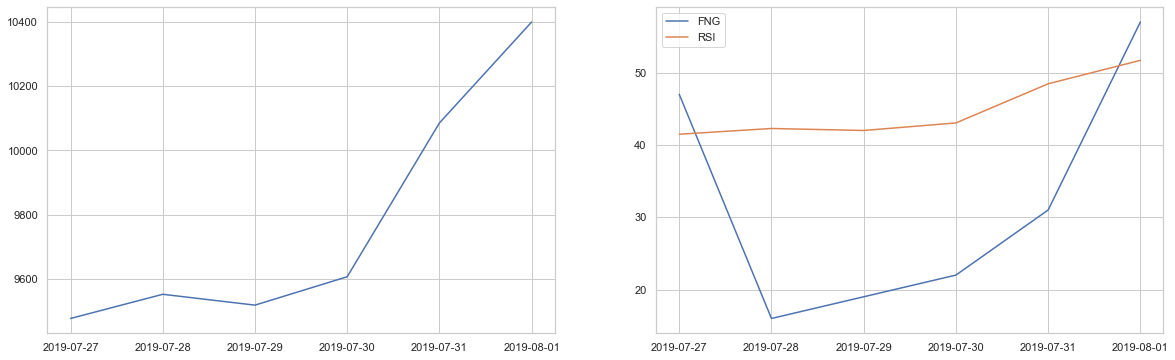

Price drop: 0.0


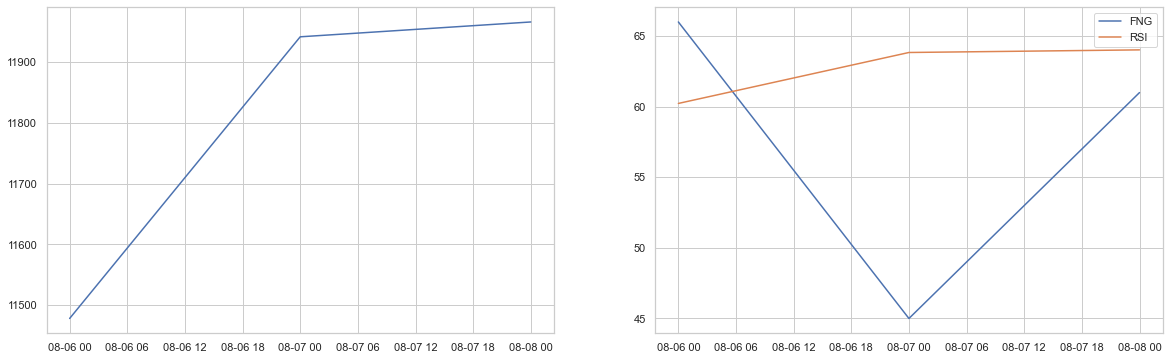

Price drop: -0.34167254424704246


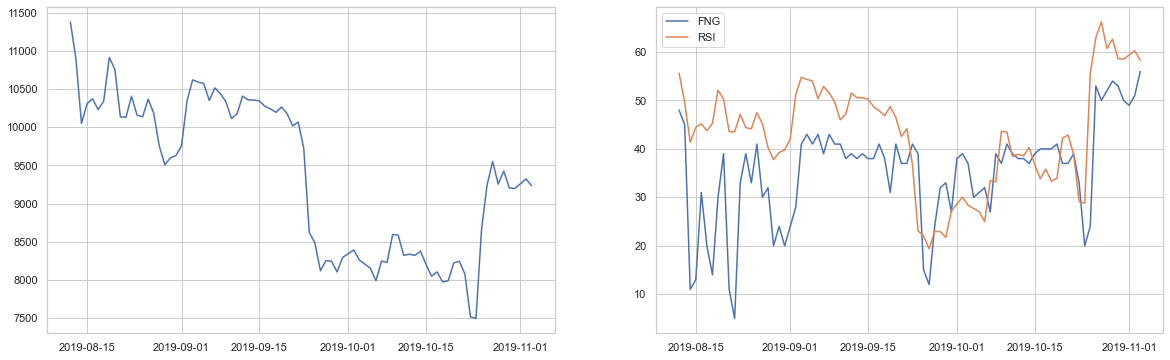

Price drop: 0.0


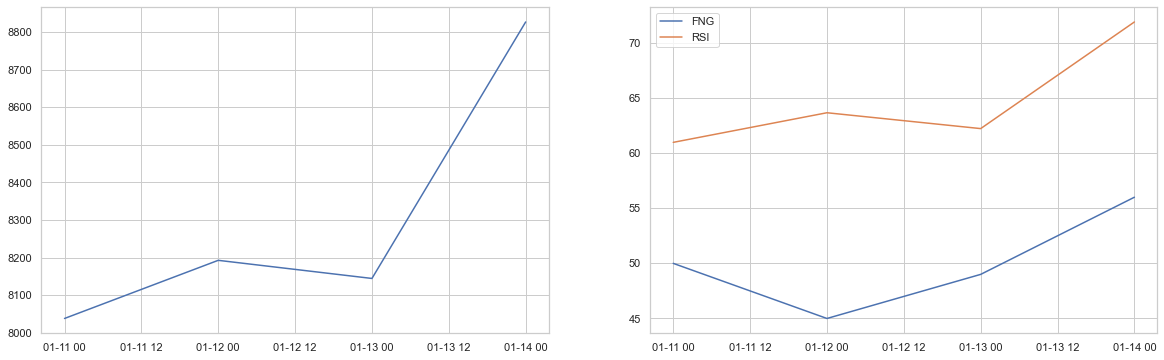

Price drop: -0.004599761747305393


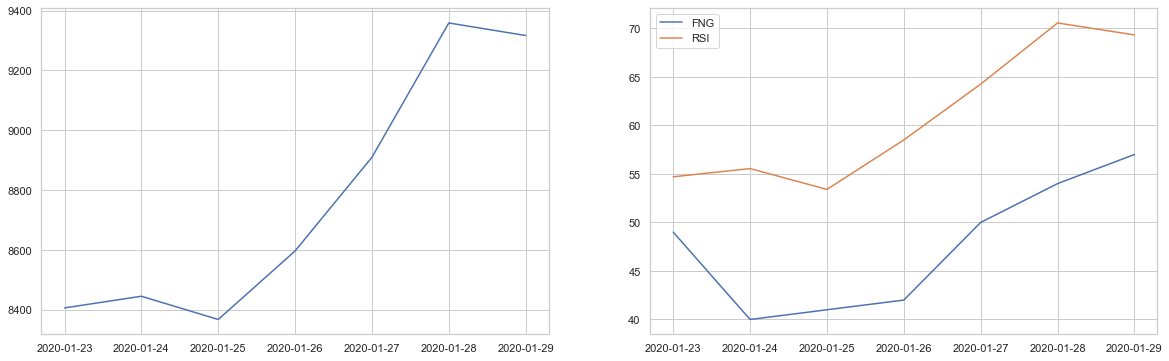

Price drop: -0.48400409627529256


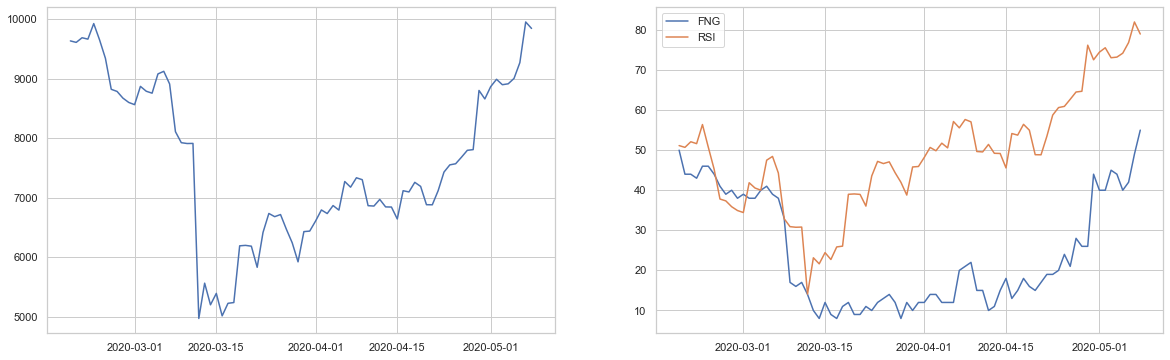

Price drop: -0.03208557590653085


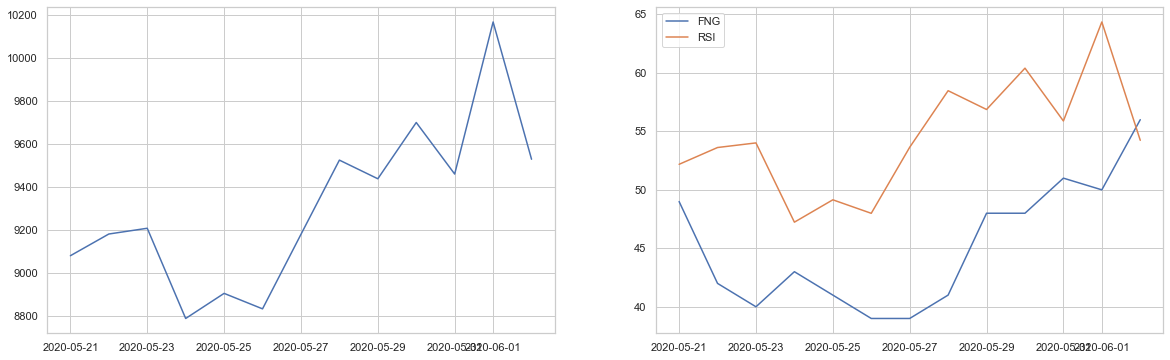

Price drop: -0.02879868459843849


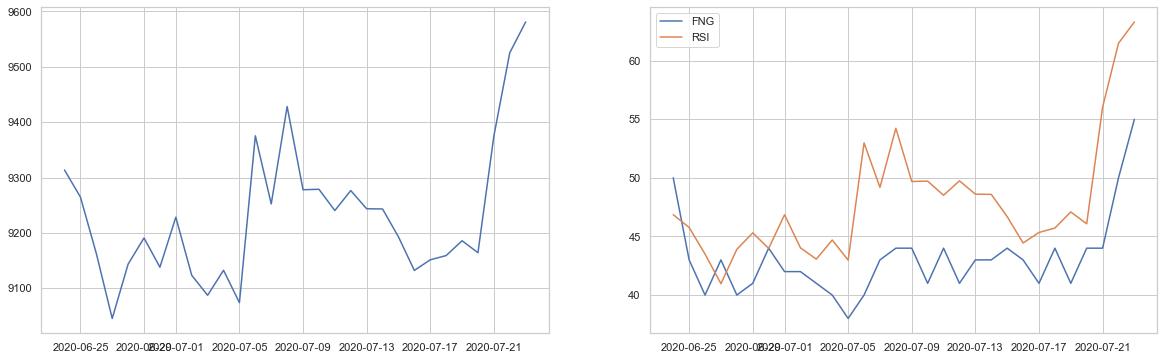

Price drop: 0.0


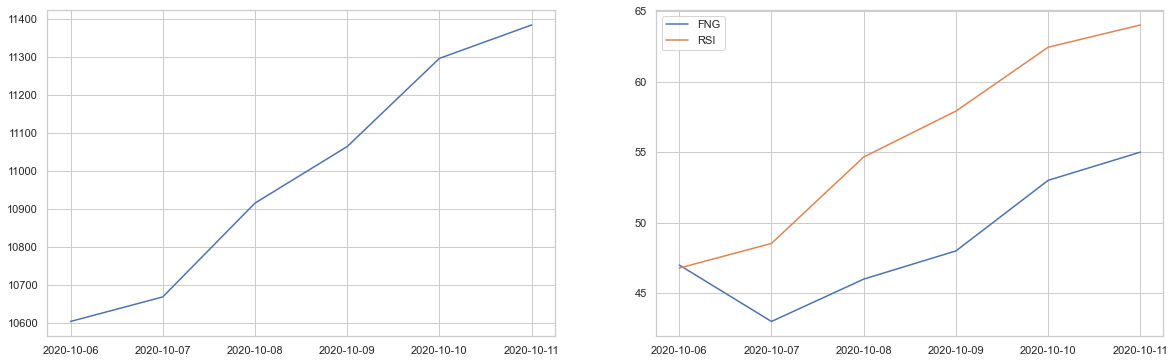

Price drop: 0.0


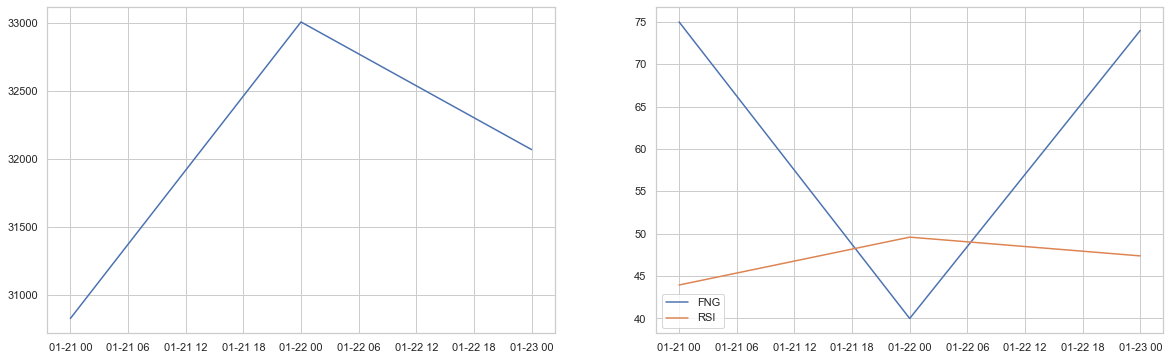

Price drop: 0.0


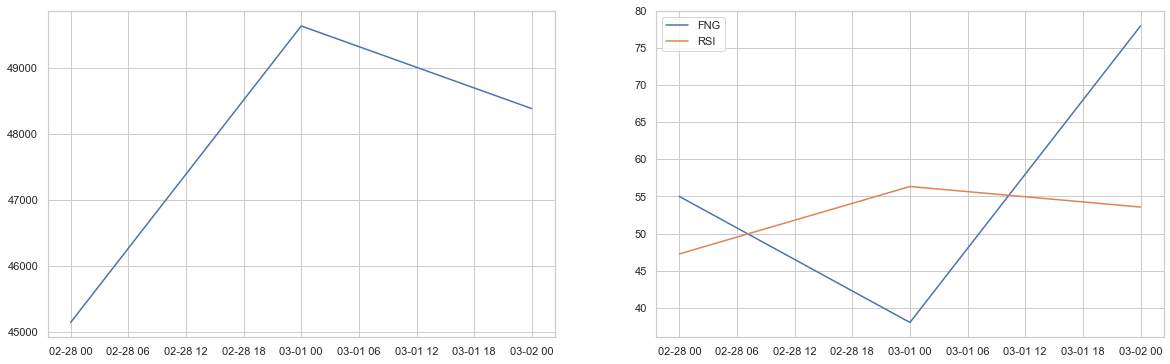

Price drop: -0.04089350324640405


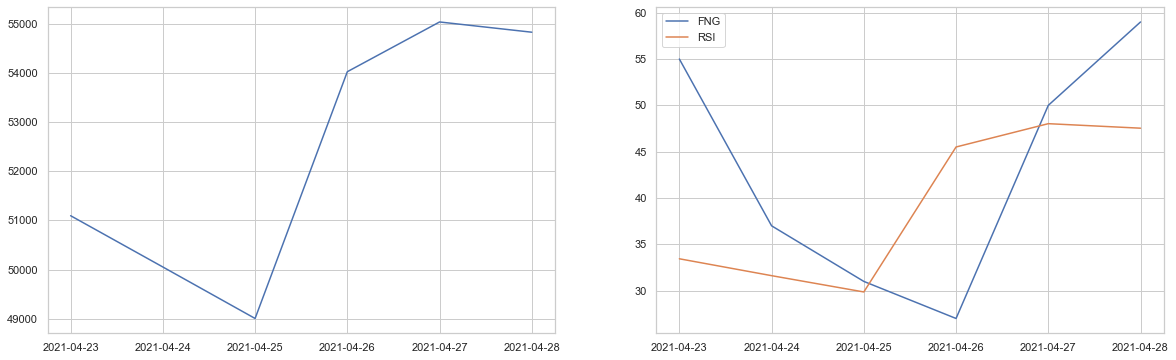

Price drop: -0.39354988584775763


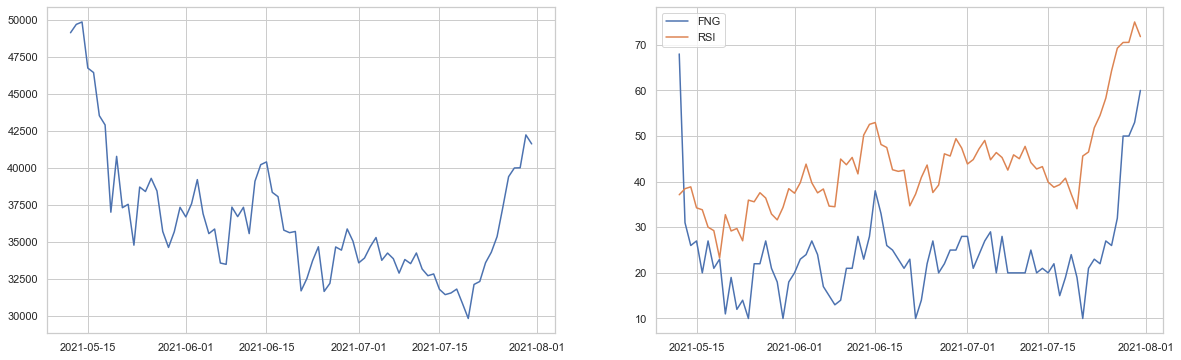

Price drop: 0.0


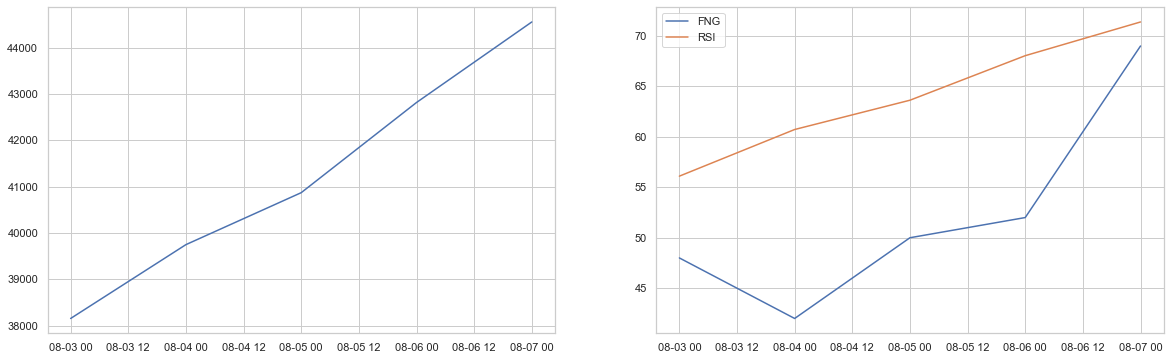

Price drop: -0.05018520674649199


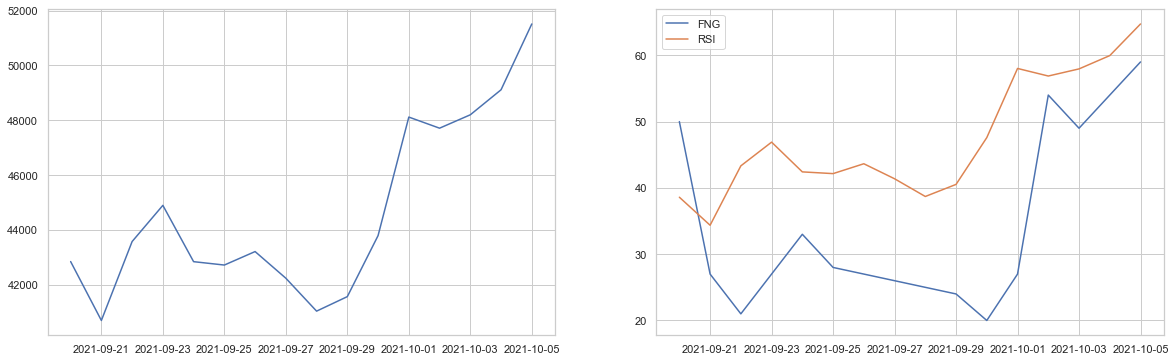

Price drop: -0.1382942564104517


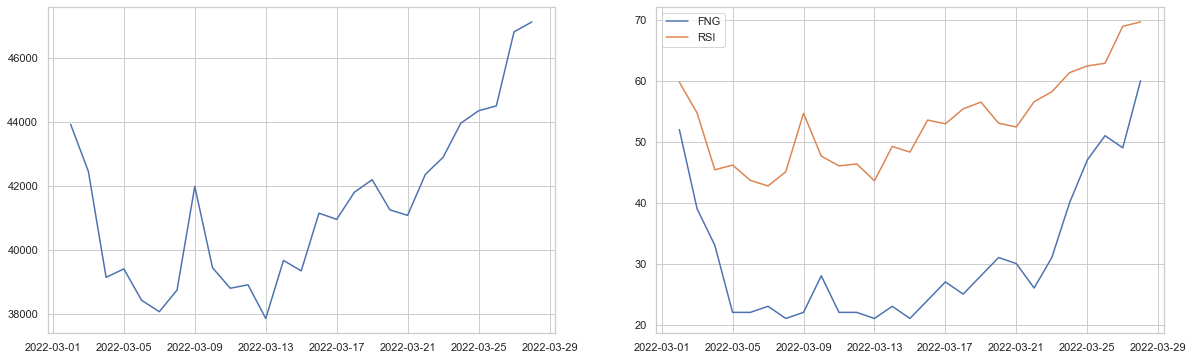

In [4]:
for start, end in fear_periods:
    df_tmp = df[start:end]
    prices = df_tmp.Close.values
    print("Price drop:", (min(prices)-prices[0])/prices[0])
    fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
    ax[0].plot(df_tmp.Close)
    ax[1].plot(df_tmp.FNG, label="FNG")
    ax[1].plot(df_tmp.rsi, label="RSI")
    ax[1].legend()
    plt.show()